# Práctica de Funciones Splines

Mario Líndez Martínez

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def GaussSeidel(A, b, maxiter=1000, tol=10**(-10)):
    """
    Esta función resuelve el sistema Ax=b de forma aproximada mediante el método iterativo de Gauss-Seidel 
    empezando las iteraciones en el vector nulo.
    PRE: Las matrices A y b deben ser arrays de NumPy.
         El número máximo de iteraciones se puede introducir por el usuario y es 1000 por defecto.
         La tolerancia también se puede introducir por el usuario y es 10^(-10) por defecto.
         El método se interrumpe cuando se alcanza el número máximo de iteraciones o cuando la tolerancia es 
         menor que la indicada.

    """
    
    n = np.shape(A)[1] # se calcula la dimensión de A
    d = np.diag(A)     # obtenemos un array con los elementos de la diagonal de la matriz A
    D = np.diag(d)     # creamos un array diagonal con los elementos de d
    R = A-D            # matriz con los elementos que no están en la diagonal
    x = np.zeros(n)
    y = np.zeros(n)
    
    if np.prod(d)==0:
        print('Hay elementos nulos en la diagonal de la matriz')
    else:
        k = 1
        er = 1
        nx = 1
        while (er > tol*nx and k < maxiter):
            nx = np.linalg.norm(x, 1)
            for i in range(n):
                y[i] = (b[i] - np.dot(A[i, :i], y[:i]) - np.dot(A[i, (i+1):], x[(i+1):])) / A[i, i]
            er = np.linalg.norm(y-x,1) # calculamos la norma de la diferencia entre y y el resultado de la iteración anterior        
            x = np.copy(y)
            #print('Iteración k=', k, '  x^(k)= ', x ) # descomentar si se quieren ver las iteraciones.
            k += 1
        return x

In [3]:
def PolInterp (puntos, coef, x):
    """
    Funcion que a traves de un array de puntos de interpolacion y sus coeficientes de Newton evaluara su polinomio de
    interpolacion en el punto x dado a traves del metodo de Newton-Horner
    """
    
    n = len(coef) - 1
    
    xn = puntos
    dn = coef
    
    bn = dn[n]
        
    for i in range (n, 0, -1):
        bn = dn[i-1] + bn*(x - xn[i-1])
        
    return (bn)

In [4]:
def h(x):
    """
    Función que calcula la longitud del intervalo de un array de puntos x
    """
    n = len(x)-1
    h = np.zeros(n)
    
    for i in range (0, n):
        h[i] = x[i+1] - x[i]
    
    return (h)
    

In [5]:
def DeltaH(x,y):
    """
    Función que calcula la pendiente en el intervalo de un array x y sus imagenes y
    Devolverá una dupla formada por delta y la longitud de intervalo (h(x))
    """
    
    n = len(x)-1
    delta = np.zeros(n)
    
    A = h(x)
    
    for i in range (0, n):
        delta[i] = (y[i+1] - y[i]) / A[i]
    
    return (delta, A)

In [6]:
def MatrizCoef (D, h):
    """
    Calcula la matriz de coeficientes a partir de los delta(i) y h(i)
    """
    n = len(D)+1
    
    A = np.zeros([n, n])
    
    A[0, 0] = 2/h[0]
    A[n-1, n-1] = 2/h[n-2]
    
    for i in range (0, n-1):
        A[i, i+1] = 1/h[i]
        
        A[i+1, i] = A [i, i+1]
        
    for i in range (1, n-1):
        A[i, i] = 2 * ((1 / h[i-1]) + (1 / h[i]))
        
    
    
    return (A)

In [7]:
def MatrizTermIndep (D, h):
    """
    Calcula la matriz de términos independientes de un spline cúbico
    """
    
    n = len(D)
    
    A = np.zeros([n+1])
    
    A[0] = D[0] / h[0]
    A[n] = D[n-1] / h[n-1]
    
    for i in range (1, n):
        A[i] = (D[i-1]/h[i-1]) + (D[i]/h[i])
        
    return (3*A)

In [8]:
def CoefPi(i, y, d, Dlt, h):
    """
    Calcula los coeficientes del p[i] de un spline cúbico
    """
    
    C = np.zeros(4)
    
    C[0] = y[i]
    C[1] = d[i]
    C[2] = (Dlt[i] - d[i]) / h[i]
    C[3] = ((d[i] + d[i+1]) - (2*Dlt[i])) / (h[i] * h[i])
    
    return (C)

In [9]:
def CalculaIndice (x, pto):
    """
    Calcula el indice del p[i] donde tendras que evaluar un punto x en un spline cúbico S(x) = {p0, ..., pi, ..., pn}
    Si el indice se pasa de donde está limitado nuestro spline, devolverá el -1
    """
    
    n = len(x)-1
    indice = -1
    
    for i in range (0, n):
        if (pto >= x[i] and pto < x[i+1]):
            indice = i
    
    if (x[n] == pto):
        indice = n-1
    
    return (indice)

In [10]:
def PolInterp (puntos, coef, x):
    """
    Funcion que a traves de un array de puntos de interpolacion y sus coeficientes de Newton evaluara su polinomio de
    interpolacion en el punto x dado a traves del metodo de Newton-Horner
    """
    
    n = len(coef) - 1
    
    xn = puntos
    dn = coef
    
    bn = dn[n]
    
    for i in range (n, 0, -1):
        bn = dn[i-1] + bn*(x - xn[i-1])
        
    return (bn)

In [11]:
def PolInterpCubico (x, coef, pto):
    """
    Evalua un pto en un spline cúbico de puntos de interpolación x y una matriz de coeficientes de los p0, ..., pn
    que forman el spline
    """
    
    m = len(pto)
    Imagen = np.zeros(m)
    
    for i in range (0, m):
        indice = CalculaIndice(x, pto[i])
        
        if (indice != -1):
            pi = coef[indice]

            xn = np.array([x[indice], x[indice], x[indice+1], x[indice+1]])

            Imagen[i] = PolInterp(xn, pi, pto[i])
        else:
            Imagen[i] = 0
        
    return (Imagen)

In [12]:
def spline (x, y):
    """
    Función que obtiene la lista de polinomios que constituyen el spline usando el sistema tridiagonal 
    de ecuaciones. Devolverá una matriz formada por los coeficientes de los polinomios de tal forma que
    
    Si pi = a + b (x-x0) + c(x-x0)(x-x0) + d(x-x0)(x-x0)(x-x1)
    
    A[i] = [a, b, c, d]
    """
    
    Dlt, H = DeltaH(x,y)
    #print ("Delta = ", Dlt, "\n")
    #print ("h = ", H, "\n")

    A = MatrizCoef(Dlt,H)
    #print ("A = ", A, "\n")

    C = MatrizTermIndep(Dlt, H)
    #print ("C = ", C, "\n")

    d = GaussSeidel(A, C)
    #print ("derivadas = ", d, "\n")

    m = len(x) - 1

    sp = np.zeros([m, 4])

    for i in range (0, m):
        sp[i] = CoefPi(i, y, d, Dlt, H)
        
    return (sp)

___

Programa de prueba para comprobar que la interpolación de splines cúbicos se realiza de forma correcta

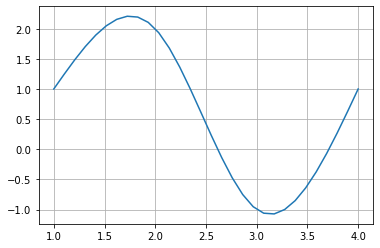

In [13]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 2, -1, 1])

sp = spline (x, y)
#print (sp)

t = np.linspace(1, 4, 30)
#print (t)

#print (CalculaIndice(x, 4))

Imt = PolInterpCubico(x, sp, t)

plt.plot (t, Imt)
plt.grid()
plt.show()


____

## DIBUJO

### - Silueta

In [14]:
"""
SILUETA
"""

#Numero de puntos
n = 221

x = np.arange(0, n+1, 1)

# ----------------------------------------------------------------------------
# IMAGEN X

y = np.array([-2.7, -2.5, -1.8872205597127867, -1.435097291407058, -1.1043774932945345, 
-0.8, -0.631322592196874, -0.5120122852828624, -0.4303789173943281, -0.398960781840083, 
-0.36900805812825715, -0.3780498354144984, -0.41991310099836215, -0.4931738157701237, -0.5580618774251125, 
-0.5685276938210785, -0.5496892243083398, -0.016761886055959442, 0.3614090780670916, 0.49809619324574383, 
0.5701531300600154, 0.6727181307404816, 0.7564446619082091, 0.75682690880984, 0.7250472127203114, 
0.8101509360565723, 0.8904071117765732, 0.8715686422638345, 0.8255190501215843, 0.8652891524262549, 
0.9039276736284121, 0.6363881576146347, 0.3666811585337, 0.20012860124084106, 0, 
-0.17877846660041508, -0.3723958144533645, -0.1808603735665758, -0.00806209537523381, 0.08562371810199981, 
0.22830132477086618, 0.3945267164880539, 0.4205003158817265, 0.4744719085997648, 0.5161071372679658, 
0.5546582749237073, 0.653349187322406, 1.1, 1.5, 1.7495313623847635, 
1.6735283834123453, 1.5, 1.462270725723006, 1.462270725723006, 1.4, 
1.3166043991450513, 1.2988007370077457, 1.3748709297762334, 1.4768373583808017, 1.5529075511492887, 
1.5642371543275742, 1.5383409184914933, 1.5, 1.5318668595324731, 1.5674741838070843, 
1.622503684958756, 1.6419258618358166, 1.6937183335079784, 1.7216857896398763, 1.7407474270334933, 
1.7598090644271103, 1.8003150438885462, 1.8038891008998494, 1.8777529458001152, 1.8680158344522841, 
1.8736060584507823, 1.9574594184282552, 1.9462789704312589, 1.9760934984232492, 2.022371156276029, 
2.068125790915387, 2.068125790915387, 2.076044862295276, 2.1402773301543747, 2.134118052414461, 
2.1305984651345105, 2.1490762983542515, 2.157466701385221, 2.194310688933554, 2.3447569714225804, 
2.4366935791907216, 2.4217300081296944, 2.3967907230279817, 2.3768392949466115, 2.416742151109352, 
2.443344055217845, 2.4499945312449687, 2.4383561981975026, 2.476596435353462, 2.5497516716518187, 
2.49749560667515, 2.4128536305652677, 2.3769990401867527, 2.384670450353468, 2.404734469218764, 
2.3572247812490286, 2.286993068598115, 2.152726559118427, 1.9585565300247247, 1.9358345053435468, 
1.8747776429636875, 1.6587955355916444, 1.2787763846458973, 0.7009633823625904, 0.7, 
0.6803456801506158, 0.6668334688569975, 0.7183772738828065, 0.7779216121861642, 0.8103545867823149, 
0.8671122923255784, 0.9400864851669173, 0.9780418047607736, 0.7562996291220638, 0.7873812297767082, 
0.835876366996897, 0.759325746662502, 0.6198942596248538, 0.5132701813019462, 0.5378757378380018, 
0.5542794421953723, 0.4585911667773784, 0.3273615319184153, 0.06490226220048931, -0.038987865396189744, 
-0.0717952741109305, -0.09366687992075766, -0.17841935243383794, -0.254969972768233, -0.33698849455508495, 
-0.5256310946648443, -0.41353911488948003, -0.8373014774548814, -1.0243476113519665, -1.171818384925646, 
-1.28293544583011, -1.559064469179178, -1.6192113851562027, -1.5832624766794172, -1.5680418891860948, 
-1.5856041055245438, -1.6968314756680547, -2.175694112475683, -2.392856931630289, -2.518328782697395, 
-2.566587186953974, -2.5810647082309477, -2.5455785178626242, -2.6004565594701745, -2.7603471645680577, 
-2.6980572980580986, -2.7890963337265005, -2.7587499885037, -2.8050680943700796, -2.9036271260397815, 
-2.914232018750136, -2.813967578579511, -2.706578239965862, -2.6953498397498974, -2.6416150906758373, 
-2.523855959726302, -2.601157795814978, -2.640109593084561, -2.599534804262079, -2.378807953067777, 
-2.2212999768269643, -2.072062549569813, -2.0897784993823785, -2.109768231593571, -2.111314286986636, 
-2.1, -2.0938682182883466, -2.2, -2.4298953190000527, -2.65, 
-2.7729397292192113, -2.8414130193985363, -2.9383407422196672, -2.996157278639289, -3.009761169561553, 
-2.996157278639289, -2.979152414986459, -3.04207041050193, -3.1619856557550383, -3.1994430316140674, 
-3.1458000787841924, -3.031867492310232, -3.0352684650407977, -3.0233650604838167, -2.979152414986459, 
-2.8720217739736302, -2.795499887535896, -2.6917702192536335, -2.3, -2.0706139318624133, 
-2.0110226520866847, -2.0509660953083855, -2.1944764271280603, -2.4920263795590434, -2.6597064632494316, 
-2.820810857383334, -2.840537926052791, -2.8254852547799505, -2.7742782105559027, -2.723071166331855, 
-2.7278603450967998, -2.734257068404359, -2.72146362178924, -2.701250161442901, -2.688559476518434, 
-2.6995531439160945, -2.7])

sp = spline (x, y)

t = np.linspace(0, n, 500)

Imx = PolInterpCubico(x, sp, t)

# ----------------------------------------------------------------------------
# IMAGEN Y

y = np.array([2.9, 3.3, 3.727120644464654, 3.81084717563238, 3.6894437054391767, 
3.4, 3.0719605380771937, 2.778917678990151, 2.500526962857458, 2.351317146354672, 
2.155126806042214, 1.9583976735464295, 1.7176838964392158, 1.4685974662152297, 1.2969580773213905, 
1.2090452195952777, 1.1420639946610966, 0.9199453200786446, 0.7779447856979493, 0.7304839818164732, 
0.7464561348935892, 0.7778535840814865, 0.7778535840814865, 0.6938477095491521, 0.6187731748628064, 
0.5871996550556892, 0.5580714397662047, 0.5078355210655688, 0.4534132758065466, 0.42410898989784235, 
0.3794198247494598, 0.23875471839170254, 0.11769999959778932, 0.09479902297002148, 0.09896283690234291, 
0.12602762746243215, 0.1676657667856464, 0.12602762746243215, 0.09896283690234291, -0.09881832488292472, 
-0.36308157871881075, -0.7287774404966177, -0.7952758907854, -0.8538736200221262, -0.9248077133086897, 
-0.9972838521014827, -0.9988258976077125, -0.9, -0.6, -0.10486102440650517, 
-0.012093597144066754, 0, 0.09609255991831717, 0.24985146019504392, 0.3, 
0.3615289772381402, 0.48129906798001154, 0.6399135124760034, 0.8001464717117502, 1.0105533878799027, 
1.1465086260193242, 1.224197333527565, 1.3, 1.3747192043247818, 1.305123070515316, 
1.2598046578021755, 1.389285836982577, 1.4766856329293478, 1.5410304113708833, 1.4957590225610438, 
1.3909200168961526, 1.3778151411880413, 1.4457222244028003, 1.5636661057758028, 1.704798601982411, 
1.8352371619473662, 1.9470416419173275, 1.8780955459358513, 1.7737446979638873, 1.7957947508793077, 
1.836270004598739, 1.7975545445192829, 1.7553194971598765, 1.7790767112995427, 1.7474004257799878, 
1.6242148709817188, 1.5265463239630912, 1.3897591542429972, 1.2254963764233493, 1.0612335986037016, 
0.9744409301759429, 0.8713585517555327, 0.781577125389369, 0.6070021296773839, 0.6784947469689587, 
0.7333611741927254, 0.6768321279621778, 0.597026415636699, 0.5720871305349868, 0.5853880825892334, 
0.5117778850875996, 0.40011483745499493, 0.27981492739663694, 0.17753817973413213, 0.08541563888296114, 
-0.026128845915547663, -0.10462311299597969, -0.14180460792881597, -0.15006716235833514, -0.3401059142372761, 
-0.7087077557891504, -1.143405921259461, -1.5070213678478341, -1.728249934128874, -1.8, 
-1.9007429853725681, -1.9787371061485923, -2.0312180712657795, -2.090824151271816, -2.1408249871075484, 
-2.193528570826293, -2.278665129141188, -2.3709497973360074, -2.3570448177485535, -2.401640157818262, 
-2.4857757278375994, -2.496711530742513, -2.469372023480229, -2.447500417670402, -2.513115235099883, 
-2.5732621510769076, -2.5513905452670804, -2.50217943219497, -2.41742695968189, -2.340876339347495, 
-2.2479220146557304, -2.1741053450475643, -2.0483436116410587, -1.9417195333181518, -1.84329730717393, 
-1.8487652086263866, -1.8460312579001583, -1.815957799911646, -1.7689795611440666, -1.7245606534411513, 
-1.7585448346608423, -1.8733707651624338, -1.9444534840443715, -1.9749561712384416, -2.0206179337184085, 
-2.083841912536825, -2.1201371596362857, -2.230602703887773, -2.302990310272642, -2.35366163474205, 
-2.3657262358061946, -2.3319453528265894, -2.2722688367859187, -2.2745554218529, -2.346899016596055, 
-2.3149554953088964, -2.318149847437612, -2.267040213378159, -2.2350966920910005, -2.242538555490865, 
-2.2150622425594917, -2.0882855706129786, -1.9924471388010279, -1.9475737572745806, -1.9029853484684462, 
-1.8343877964590085, -1.6816873002575687, -1.483682330803858, -1.2353646232102697, -0.8750604984666321, 
-0.7391354997511004, -0.6462186895078351, -0.5260122836850947, -0.3429063366305746, -0.21451121599951312, 
0, 0.11696408926798361, 0.1, 0.09567861301834275, 0.1, 
0.10024673773956028, 0.07017131753909801, 0.03786207659872132, 0.029359644772306404, 0.07187180390438098, 
0.15859660853381316, 0.24872238589381127, 0.29633600412173483, 0.38458227266946327, 0.43991703246121083, 
0.47998853157229704, 0.5088967997821078, 0.568413822567012, 0.6398342499088973, 0.6551386271964441, 
0.6381337635436143, 0.6228293862560674, 0.6840468954062549, 0.9, 1.0273167902505314, 
1.067328078099949, 1.091929887777909, 1.1641518210962678, 1.3482711286778695, 1.5159512123682568, 
1.7296611229540444, 1.8414478454143026, 1.9492863792095012, 2.0895491525188485, 2.1852840612855458, 
2.246287842932051, 2.4663351247120953, 2.6531194452928326, 2.7486192076058207, 2.8237696848356935, 
2.8521372767410345, 2.9])

sp = spline (x, y)

Imy = PolInterpCubico(x, sp, t)

### - Barriga

In [15]:
"""
BARRIGA
"""
#Numero de puntos
n = 30

x = np.arange(0, n+1, 1)

# ----------------------------------------------------------------------------
# IMAGEN X

y = np.array([-1.9248878718899616, -2.009484130929491, -2.0576567947114928, -2.09387, -2.0417137628442115, 
-1.95314136358154, -1.7600535331889156, -1.4535930317400712, -1.1046177786451443, -0.7662712134617383, 
-0.6, -0.49523967171796285, -0.4137530643963048, -0.3821827844301268, -0.36501, 
-0.30013471207567594, -0.36501, -0.43560943619581577, -0.527197982079854, -0.5615436867863686, 
-0.5291060767857717, -0.4241608679603112, -0.33699, -0.5256310946648443, -0.41354, 
-0.8373, -1.02435, -1.17182, -1.4738291010746258, -1.990450794372445, 
-2.072062549569813])

sp = spline (x, y)

t = np.linspace(0, n, 500)

ImxBarriga = PolInterpCubico(x, sp, t)

# ----------------------------------------------------------------------------
# IMAGEN Y

y = np.array([0.800621805354891, 0.5660594507452886, 0.3435881291980028, 0.11696, 0.23907269806805076, 
0.4303890804754206, 0.7209065500569823, 0.8856512126855506, 0.7262208940127424, 0.30107337755192054, 
0, -0.25338984183240126, -0.5013925597678807, -0.6697200361109291, -0.74032, 
-0.652547183757672, -0.74032, -0.873886169644097, -1.102857534354192, -1.3241965202406176, 
-1.537903127303373, -1.7058154614241092, -1.8433, -1.8487652086263866, -1.84603, 
-1.81596, -1.76898, -1.72456, -1.5684237616203685, -0.937880361595337, 
-0.6462186895078351])

sp = spline (x, y)

ImyBarriga = PolInterpCubico(x, sp, t)

### - Ojo izquierdo

In [16]:
"""
OJO IZDO
"""
#Numero de puntos
n = 12

x = np.arange(0, n+1, 1)

# ----------------------------------------------------------------------------
# IMAGEN X

y = np.array([-2.723071166331855, -2.7278603450967998, -2.734257068404359, -2.72146362178924, -2.701250161442901, 
-2.688559476518434, -2.602887577282923, -2.5314823853737747, -2.4600771934646266, -2.4600771934646266, 
-2.4784385285269788, -2.574325500519264, -2.723071166331855])

sp = spline (x, y)

t = np.linspace(0, n, 500)

ImxOjoIzdo = PolInterpCubico(x, sp, t)

# ----------------------------------------------------------------------------
# IMAGEN Y

y_OjoIzdo = np.array([2.1852840612855458, 2.246287842932051, 2.4663351247120953, 2.6531194452928326, 2.7486192076058207, 
2.8237696848356935, 2.8905953558187827, 2.796748532166759, 2.472364946065199, 2.186744178428605, 
2.0888170580960583, 2.1132988381791953, 2.1852840612855458])

sp = spline (x, y)

ImyOjoIzdo = PolInterpCubico(x, sp, t)

### - Ojo derecho

In [17]:
"""
OJO DCHO
"""
#Numero de puntos
n = 9

x = np.arange(0, n+1, 1)

# ----------------------------------------------------------------------------
# IMAGEN X

x_OjoDcho = np.array([-1.0647003287683825, -1.1257419460049298, -1.1, -0.9509539929427868, -0.7781299494656116, 
-0.6485119168577304, -0.5817389909688218, -0.6249450018381155, -0.8684697903741351, -1.0647003287683825])

sp = spline (x, y)
t = np.linspace(0, n, 500)

ImxOjoDcho = PolInterpCubico(x, sp, t)

# ----------------------------------------------------------------------------
# IMAGEN Y

y_OjoDcho = np.array([2.1660561530054587, 2.4894198801494793, 2.8, 3.045206292695396, 2.8743461588031884, 
2.577795811473035, 2.3146319270873357, 2.2341116341036518, 2.1182409685905452, 2.1660561530054587])

sp = spline (x, y)

ImyOjoDcho = PolInterpCubico(x, sp, t)

### - Boca

In [22]:
"""
BOCA
"""
#Numero de puntos
n = 33

x = np.arange(0, n+1, 1)

# ----------------------------------------------------------------------------
# IMAGEN X

x_boca = np.array([-2.4611969938176443, -2.417367542520811, -2.3927759313622223, -2.351399749726326, -2.4612, 
-2.3514, -2.2330446255120187, -2.0021077977767843, -1.8414142551443506, -1.5370583807980016, 
-1.1498037196433941, -0.9523797747410452, -0.8764474882401418, -0.8, -0.95238, 
-0.8, -0.6733286218502251, -0.8574644166149159, -0.980854382178884, -1.0567866686797875, 
-1.0605832830048327, -0.980854382178884, -1.0605832830048327, -1.2712953780448397, -1.603499131486292, 
-1.95469, -1.9793639496657642, -2.0477, -1.95469, -2.0477, 
-2.29457, -2.39278, -2.29457, -2.23304])

sp = spline (x, y)

t = np.linspace(0, n, 500)

ImxBoca = PolInterpCubico(x, sp, t)

# ----------------------------------------------------------------------------
# IMAGEN Y

y_boca = np.array([1.6637849031354908, 1.5184556698880962, 1.5459593720024256, 1.6325606824031387, 1.66378, 
1.63256, 1.594071211113933, 1.5170922685355213, 1.468980429424014, 1.5763334352258769, 
1.6807403291646195, 1.7414861583653425, 1.6256894214514643, 1.8, 1.74149, 
1.8, 1.8762659669044468, 1.5497571349505606, 1.4282654765491143, 1.4605366983119985, 
1.3675196473483913, 1.4282654765491143, 1.3675196473483913, 1.2384347602968548, 1.13972278784568, 
1.23843, 1.3428416542355976, 1.28969, 1.23843, 1.28969, 
1.46245, 1.54596, 1.46245, 1.59407])

sp = spline (x, y)

ImyBoca = PolInterpCubico(x, sp, t)



In [38]:
def plotspline (x, y, clr="black"):
    n = len(x)-1
    
    ptos = np.linspace(0, n, n)
    spx = spline (ptos, x)

    t = np.linspace(0, n, 500)
    
    spy = spline (ptos, y)
    
    Imx = PolInterpCubico(ptos, spx, t)
    Imy = PolInterpCubico(ptos, spy, t)
    
    return (plt.plot(Imx, Imy, color=clr))

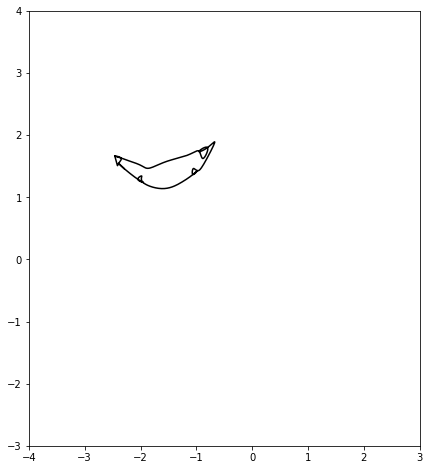

In [47]:
# ----------------------------------------------------------------------------
# IMAGEN X

x = np.array([-2.4611969938176443, -2.417367542520811, -2.3927759313622223, -2.351399749726326, -2.4612, 
-2.3514, -2.2330446255120187, -2.0021077977767843, -1.8414142551443506, -1.5370583807980016, 
-1.1498037196433941, -0.9523797747410452, -0.8764474882401418, -0.8, -0.95238, 
-0.8, -0.6733286218502251, -0.8574644166149159, -0.980854382178884, -1.0567866686797875, 
-1.0605832830048327, -0.980854382178884, -1.0605832830048327, -1.2712953780448397, -1.603499131486292, 
-1.95469, -1.9793639496657642, -2.0477, -1.95469, -2.0477, 
-2.29457, -2.39278, -2.29457, -2.23304])

# ----------------------------------------------------------------------------
# IMAGEN Y

y = np.array([1.6637849031354908, 1.5184556698880962, 1.5459593720024256, 1.6325606824031387, 1.66378, 
1.63256, 1.594071211113933, 1.5170922685355213, 1.468980429424014, 1.5763334352258769, 
1.6807403291646195, 1.7414861583653425, 1.6256894214514643, 1.8, 1.74149, 
1.8, 1.8762659669044468, 1.5497571349505606, 1.4282654765491143, 1.4605366983119985, 
1.3675196473483913, 1.4282654765491143, 1.3675196473483913, 1.2384347602968548, 1.13972278784568, 
1.23843, 1.3428416542355976, 1.28969, 1.23843, 1.28969, 
1.46245, 1.54596, 1.46245, 1.59407])

#Tamaño de la imagen
plt.rcParams["figure.figsize"] = (7, 8)
plotspline(x, y)

#Establecemos un límite para la y
plt.ylim(-3, 4)
plt.xlim(-4, 3)

plt.show()

## DIBUJO FINAL

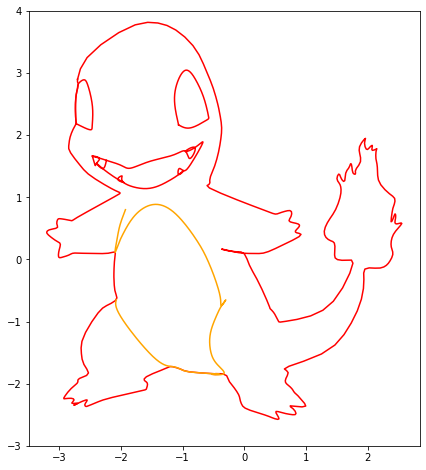

In [23]:
#Tamaño de la imagen
plt.rcParams["figure.figsize"] = (7, 8)

#Formamos las imagenes
plt.plot (Imx, Imy, color="red")
plt.plot(ImxBarriga, ImyBarriga, color="orange")
plt.plot (ImxOjoIzdo, ImyOjoIzdo, color="red")
plt.plot (ImxOjoDcho, ImyOjoDcho, color ="red")
plt.plot (ImxBoca, ImyBoca, color="red")

#Establecemos un límite para la y
plt.ylim(-3, 4)
plt.show()